In [1]:
import numpy as np


In [3]:
%timeit my_list = [i**2 for i in range(1000000)]

299 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit

out = []
for i in range(1000000):
    out.append(i**2)

344 ms ± 32.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%timeit a = np.arange(1000000)**2

2.31 ms ± 437 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
## 1.2

In [11]:
k = np.arange(40)

print(np.sum((-1)**k/(3**k*(2*k+1)))*np.sqrt(12))
print(np.pi)

3.1415926535897927
3.141592653589793


In [17]:
# 1.3 Allan variance

y = np.random.normal(size=10000)

# let us call z : y_{k+1} - y_k
# z[0] = y[1] - y[0]
# z[1] = y[2] - y[1]
# ...
# z = a - b
# a = [y[1], y[2], ... y[-1]]
# b = [y[0], y[1], ... y[-2]]

# a = y[1:]
# b = y[:-1]
# z = b-a
# 0.5*np.mean(z**2)

0.5*np.mean((y[1:] - y[:-1])**2)
    

0.9767250264647013

In [19]:
0.5*np.mean(np.diff(y)**2)

0.9767250264647013

In [28]:
def _allan_variance(y):
    """ Calculate the allan variance of y"""
    return 0.5*np.mean(np.diff(y)**2)

In [24]:
data = np.arange(10)
data = data.reshape((5, 2))
data.mean(axis=1)

array([0.5, 2.5, 4.5, 6.5, 8.5])

In [27]:
def average_frequency(data, n):
    N = len(data)
    data = data[N%n:]
    data = data.reshape((N//n, n))
    return data.mean(axis=1)

average_frequency(np.arange(101), 5)

array([ 3.,  8., 13., 18., 23., 28., 33., 38., 43., 48., 53., 58., 63.,
       68., 73., 78., 83., 88., 93., 98.])

In [29]:
def allan_variance(data, n):
    return _allan_variance(average_frequency(data, n))

In [30]:
allan_variance(y, 10)

0.10150166128478959

# Bode plot

In [31]:
def H(omega, omega_0, zeta):
    return omega_0**2/(omega_0**2 - omega**2  + 2J*zeta*omega*omega_0)


In [32]:
%matplotlib inline
from matplotlib.pyplot import figure

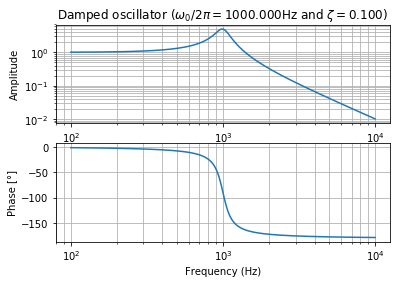

In [46]:
fig = figure()
ax1, ax2 = fig.subplots(2, 1)

freq = np.logspace(2, 4, 201)
omega_0 = 2*np.pi*1E3
zeta = 0.1
y = H(2*np.pi*freq, omega_0, zeta)

ax1.loglog(freq, np.abs(y))
ax1.set_ylabel('Amplitude')
ax1.grid(which='both')

phase = np.angle(y)
ax2.semilogx(freq, phase*180/np.pi)
ax2.set_ylabel('Phase [°]')
ax2.set_xlabel('Frequency (Hz)')
ax2.grid(which='both')

ax1.set_title(fr'Damped oscillator ($\omega_0/2\pi={omega_0/(2*np.pi):.3f}$Hz and $\zeta={zeta:.3f}$)');

## Measurment of pi

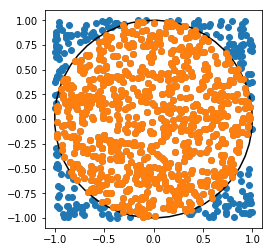

In [54]:
N = 1000
X = np.random.rand(N)*2-1
Y = np.random.rand(N)*2-1

fig = figure()
ax = fig.subplots(1, 1)

ax.plot(X, Y, 'o')

theta = np.linspace(0, 2*np.pi)
ax.plot(np.cos(theta), np.sin(theta), 'k')

R_square = X**2 + Y**2
mask = R_square<1

ax.plot(X[mask], Y[mask], 'o')
ax.set_aspect(1)

In [55]:
np.sum(mask)

775

In [57]:
N = 10000000
X = np.random.rand(N)*2-1
Y = np.random.rand(N)*2-1

R_square = X**2 + Y**2
mask = R_square<1

print(np.mean(mask)*4)

3.1419348
